In [ ]:
%cd ..

In [2]:
import argparse
import collections
import random
import pyro
import torch
import matplotlib.pyplot as plt
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

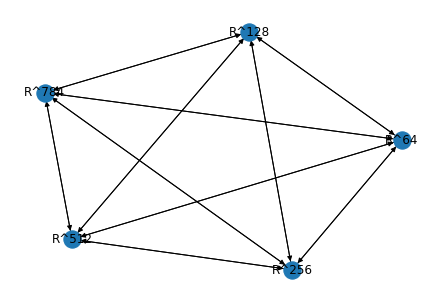

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
model.resume_from_checkpoint('saved/models/Mnist_VaeCategory/0514_151554/model_best.pth')
model.eval()

VAECategoryModel(
  (global_element_{R^64, 0}): StandardNormal()
  (global_element_{R^128, 0}): StandardNormal()
  (global_element_{R^256, 0}): StandardNormal()
  (global_element_{R^512, 0}): StandardNormal()
  (global_element_{R^784, 0}): StandardNormal()
  (likelihood_0): PathDensityNet(
    (residual_layer): Sequential(
      (0): Linear(in_features=64, out_features=456, bias=True)
      (1): BatchNorm1d(456, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=456, out_features=784, bias=True)
      (4): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (identity_layer): Linear(in_features=64, out_features=784, bias=True)
    (distribution): BernoulliObservation()
  )
  (likelihood_1): PathDensityNet(
    (residual_layer): Sequential(
      (0): Linear(in_features=256, out_features=648, bias=True)
      (1): BatchNorm1

In [11]:
validation_data = random.choice(list(valid_data_loader))[0]

In [12]:
path, latents, prediction_data = model(observations=validation_data)

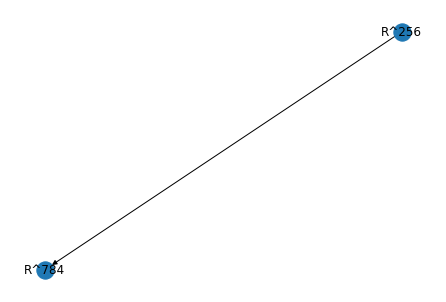

In [13]:
model.draw(path)

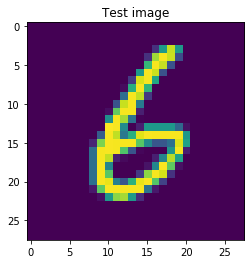

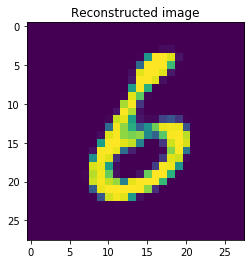

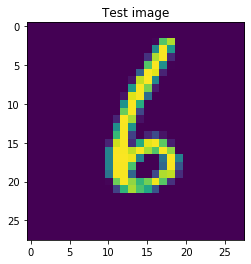

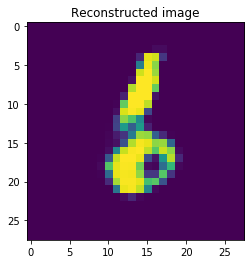

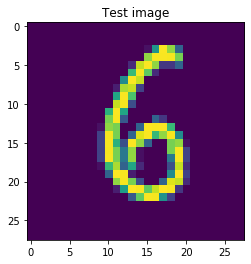

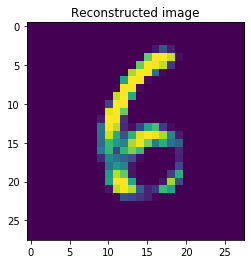

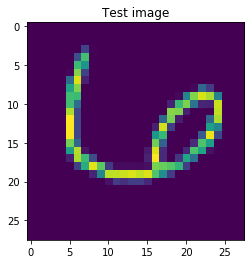

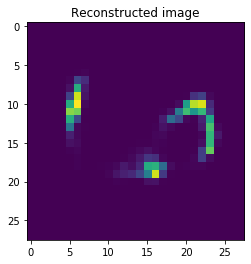

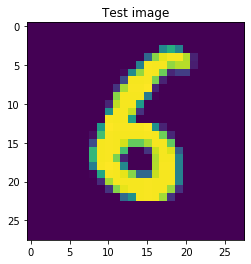

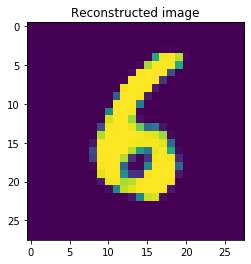

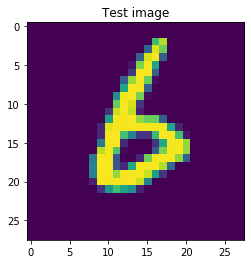

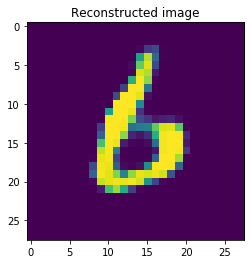

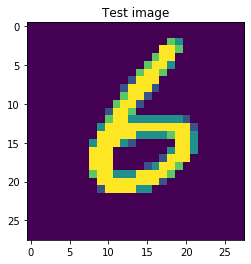

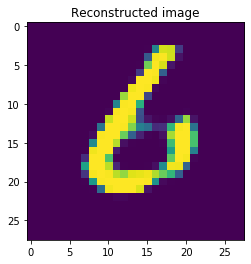

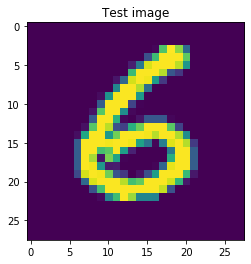

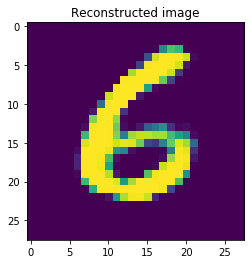

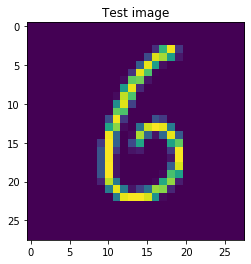

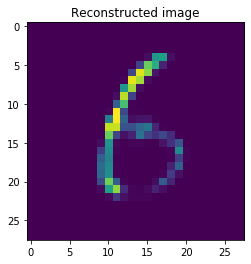

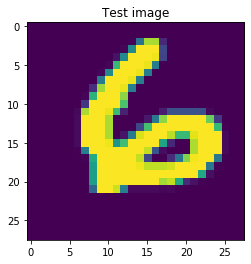

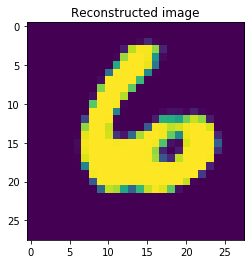

In [14]:
for k in np.random.randint(0, validation_data.shape[0], 10):
    image = validation_data[k].view(28, 28).detach().cpu().numpy()
    plt.title('Test image')
    plt.imshow(image)
    plt.show()

    prediction = prediction_data[k].view(28, 28).detach().cpu().numpy()
    plt.title('Reconstructed image')
    plt.imshow(prediction)
    plt.show()

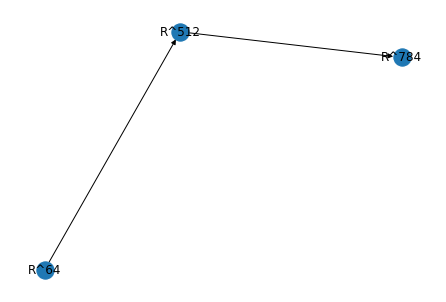

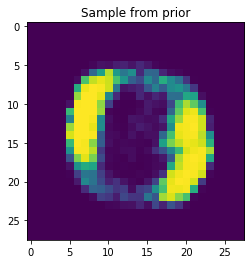

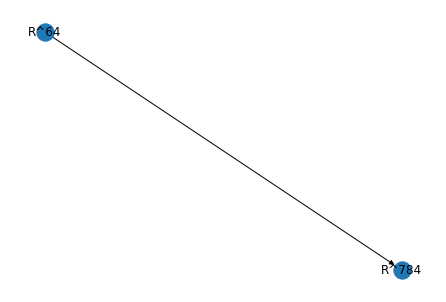

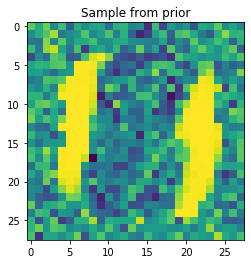

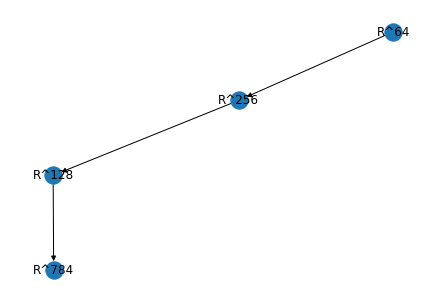

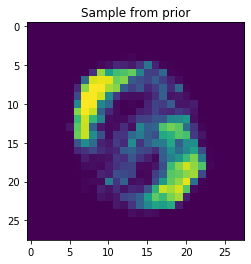

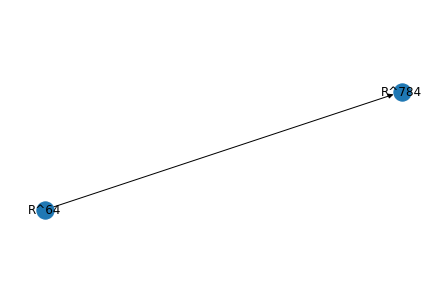

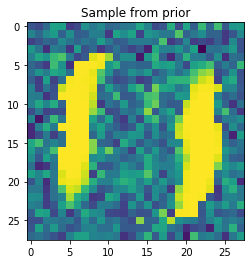

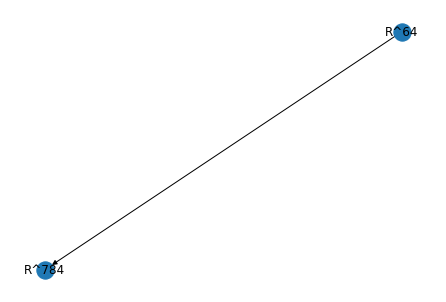

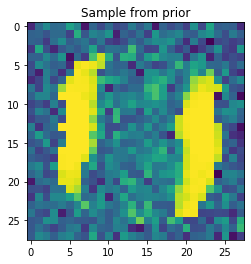

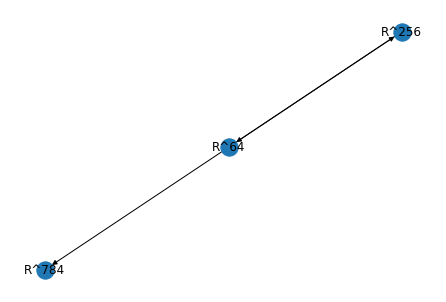

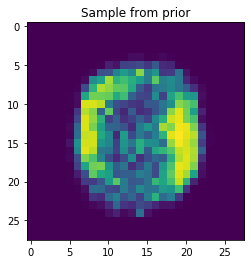

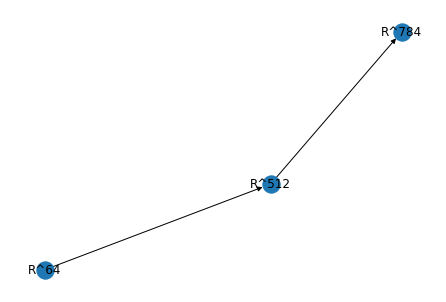

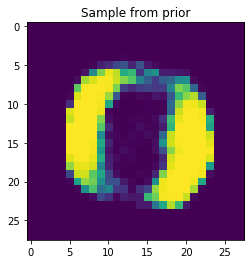

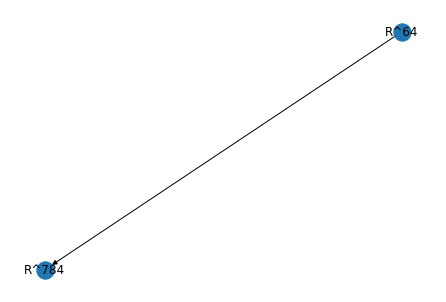

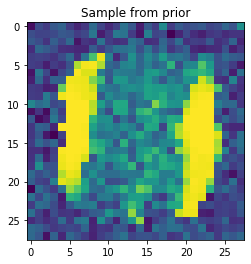

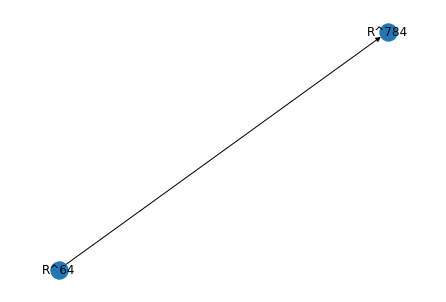

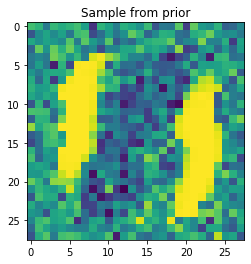

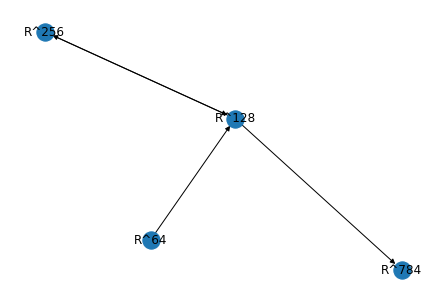

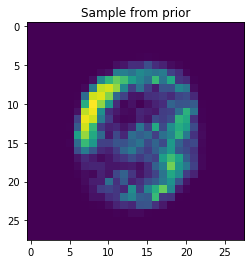

In [15]:
for k in range(10):
    path, latents, sample = model(None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    model.draw(path)
    plt.show()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()